# Hypothesis Testing

__Agenda__

- Hypothesis Testing - Why do we need them?

- One or two tailed hypothesis testing? Which one we should use, when?

- Discussion of significance level. It's effect on our study.

- Diagnosis and understanding of possible mistakes of the study.

- Seeing hypothesis testing in action

- Discussion of T-distribution. Why do we start talking about T-dist?

- One sample and two sample T-tests.

# Scenario

Below you will be loading the salaries of 100 Flatiron School Data Science graduates (Of course I made up this data :)). Let's say we know that the average salary for all data science bootcamp graduates is 82K and the standard deviation is 10K. Now we would like to understand whether Flatiron School graduates are making more money than other bootcamp graduates.

In [21]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

Pickle is a Python module that allows us to save Python objects for later use. Here I created "sample" as a numpy ndarray object and saved it with pickle.

In [22]:
import pickle

In [23]:
with open('flatiron_salary.pickle', 'rb') as handle:
    sample = pickle.load(handle)

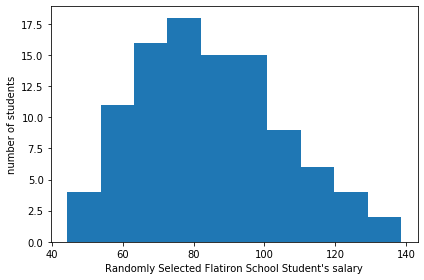

In [24]:
plt.hist(sample)

plt.xlabel("Randomly Selected Flatiron School Student's salary")

plt.ylabel('number of students')

plt.tight_layout()


A hypothesis test consists of several stages:

1. Hypothesis: also known as the research hypothesis or __alternative hypothesis__ ($H_{a}$). In our case, we hypothesize that the Flatiron School Data Science graduates are making more salary than other data science bootcamp graduates.
3. Set-up the __null hypothesis__ ($H_{0}$) that our sample is in fact drawn from a population with the same mean as national bootcamp population. (Naively we can say "there is no difference between Flatiron Student graduates salary and National bootcamp average.")
4. Set significance level ($\alpha$ which is usuall 0.05 in social studies).
5. Construct the sampling distribution of the particular statistic on the assumption that $H_{0}$ is true.
6. Compare the sample statistic to that distribution. Find a the probability of getting the sample mean 84.68K under the null-hypothesis assumption.
7. Reject or retain $H_{0}$

Now let's check the sample mean

In [25]:
x_bar = sample.mean()
x_bar

84.68905872728084

# Null and Alternative Hypotheses



## Alternative Hypothesis ($H_{a}$)
<img src="img/giphy.gif" width="350">

- claims the difference in the results due to the independent variable (FS in this case)

- Alternative can be directional or non-directional. (More salary, Less salary or just different)

$H_a$: The average salary for the FS-DS graduates is higher than the national DS bootcamp graduates average.

## Null Hypothesis ($H_{0}$)

$H_{0}$: The FS-DS graduates average salary is not different or less than the national DS bootcamp graduates avereage salary.

- $H_0$ should be logical complement of $H_{a}$.

- That is to say: If Alternative is bidirectional than null-hypothesis claims no relation between independent and dependent variables

- Alternative is directional (say claims a positive relation) then null claims there is no positive relation which means no effect or an effect in the opposite direction of the Alternative hypothesis.

## Significance Level ($\alpha$)

Basically setting how unlikely is too unlikely. Usually we will set is to $\alpha = 0.05$


- p-value: if $H_{0}$ would be true what is the probability of getting such experiment results by just chance. 

- If this probability is less than a critical pre-determined level $\alpha$ (significance level - $\alpha$ - value) then we reject the null hypothesis.

- If the obtained probability $p_{value} \leq \alpha$: reject $H_{0}$

- If the obtained probability $p_{value} \geq \alpha$: fail to reject $H_{0}$, retain $H_{0}$

- Usually $\alpha = 0.05$ - Let's talk what it means in action?

# Continue the Scenario

Note that we have found that x_bar = 84.68. What would be the sampling distribution of the means? Central limit theorem is in our help here.

In [26]:
mu_national = 82
sigma_national = 10

## sample size
n = len(sample)

## The mean of the sampling mean distribution
## Under the Null-Hypothesis it should be national average
mu_sampling_mean = mu_national

sigma_sampling_mean = sigma_national/np.sqrt(n)

Here I will plot the sampling distribution of the means. Don't try to understand the code. Instead focus on the figure itself.

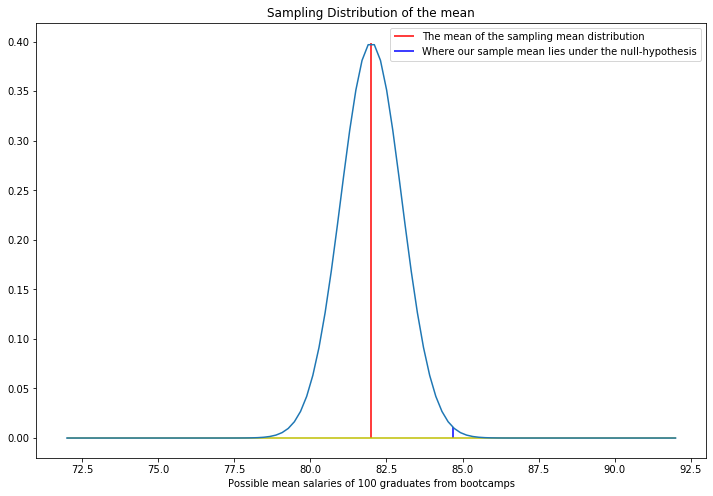

In [33]:
plt.figure(figsize = (12, 8))
xsampling = np.linspace(72, 92, 100)
ysampling = stats.norm.pdf(xsampling, loc = mu_national, scale= sigma_sampling_mean)

plt.plot(xsampling,ysampling)
plt.vlines(x = mu_national, ymin = 0, ymax = stats.norm.pdf(mu_national,
                                                            loc = mu_national, scale = sigma_sampling_mean),
           label="The mean of the sampling mean distribution", color = 'red')

plt.vlines(x = x_bar, ymin = 0, ymax = stats.norm.pdf(x_bar,
                                                            loc = mu_national, scale = sigma_sampling_mean),
           label="Where our sample mean lies under the null-hypothesis", color = 'blue')

plt.hlines(y = 0,xmin = 72, xmax = 92, color = 'y' )

plt.xlabel('Possible mean salaries of 100 graduates from bootcamps')


plt.title('Sampling Distribution of the mean')
plt.legend()
plt.show()

Now let find p_value: What is the probability of x_bar = 84.68 and higher if the null-hypothesis is correct?

To solve this problem we will calculate z_score: $\large\frac{\bar{x} - \mu}{se}$